# Training the model

This notebook loads a PDF dataset and trains an XGBoost model to classify the structure of a metallic nanoparticle based on its PDF. The model is trained to predict a specific atomic model for an atomic pair distribution (PDF) from a total scattering experiment on a metallic nanoparticle. There are 4044 atomic models to predict, as seen in the xyz_files folder containing all of them. The model is given PDFs with 300 datapoints from r = 0 Å to r = 30 Å, with a step length of 0.1. 

The model is trained for 500 epochs with early stopping after 5 rounds of no improvement in validation loss. The learning rate is 0.15 and the max depth is 3. There is no hyperparameter optimization.

**How to use:** Run the cells underneath from top to bottom 

The first cell imports packages and functions from the backend. The second cell imports a PDF dataset. The third cell trains an XGBoost model. The fourth cell saves the trained XGBoost model.

# Import packages and functions from backend

In [1]:
import sys, os, os.path, h5py, time

from os import walk
import pandas as pd
import xgboost as xgb

sys.path.append("Backend")

from training import load_PDFs, ML, sort_filenames, get_training_data_backend, plot_loss_curve
sorted_filenames_flat, xyz_path = get_training_data_backend(xyz_folder_name = "natoms200")

# Import PDF dataset

Load PDF dataset from the folder "/PDF_datasets/". Specify the folder name of the dataset you want to load.

In [2]:
folder_name = "big_seed37"

X_train, y_train, X_val, y_val, X_test, y_test = load_PDFs(folder_name)
display(X_test)

,1,2,3,4,5,6,7,8,9,10,...,294,295,296,297,298,299,300,qmin,qmax,qdamp
0,0.0,0.003952,0.021042,0.024643,0.024216,0.038086,0.038422,0.029007,0.036682,0.032959,...,-0.000710,-0.001879,-0.002951,-0.004070,-0.004940,-0.005562,-0.006134,1.890625,19.703125,0.025574
1,0.0,0.045227,0.011414,-0.058136,-0.057953,0.006577,0.020294,-0.050507,-0.100464,-0.058289,...,0.013191,0.001565,-0.006065,0.002460,0.014534,0.011139,-0.002506,1.344727,13.640625,0.019730
2,0.0,-0.009575,-0.025497,-0.034088,-0.044067,-0.060272,-0.068237,-0.078186,-0.094238,-0.101562,...,0.000738,0.001171,0.000800,0.001485,0.001865,0.001393,0.002077,0.890137,20.843750,0.018417
3,0.0,-0.003716,-0.012566,-0.026947,-0.038391,-0.040405,-0.041595,-0.055115,-0.076111,-0.085327,...,0.000949,-0.004181,-0.009781,-0.006809,-0.000596,-0.001470,-0.007866,1.306641,14.140625,0.022705
4,0.0,0.005413,-0.008621,-0.029907,-0.032837,-0.021988,-0.027771,-0.055054,-0.071289,-0.060638,...,0.003008,0.000843,0.003641,0.007980,0.008049,0.004154,0.002710,1.341797,13.468750,0.017685
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
56140,0.0,-0.022720,-0.023865,-0.014214,-0.022751,-0.050629,-0.066956,-0.058563,-0.052338,-0.071899,...,-0.000478,-0.000728,-0.001161,-0.001184,-0.000822,-0.000724,-0.001116,0.639648,13.531250,0.029572
56141,0.0,0.003487,-0.004852,0.000344,0.001952,-0.007774,-0.002640,-0.003136,-0.014076,-0.010162,...,0.004654,0.004879,0.004929,0.004967,0.004807,0.004498,0.004189,1.585938,21.593750,0.011719
56142,0.0,0.002918,-0.010963,-0.021896,-0.015640,-0.015572,-0.033325,-0.040894,-0.029816,-0.035187,...,0.000141,0.000181,0.000470,0.000423,0.000205,0.000345,0.000562,0.682617,17.078125,0.036774
56143,0.0,0.061584,0.034698,-0.058594,-0.097839,-0.034454,0.034576,0.008232,-0.086609,-0.133179,...,-0.001886,0.003902,0.002802,-0.003876,-0.007084,-0.002823,0.003088,0.539062,12.265625,0.039276


# Train XGBoost model

Train the XGBoost model on the loaded PDF dataset. n_threads specifies how many CPU cores are used by XGBoost. Early stopping is turned on with 5 early stopping rounds.

In [3]:
import torch, random
import pytorch_lightning as pl
import numpy as np
seed = 37
torch.manual_seed(seed)
pl.seed_everything(seed)
np.random.seed(seed)
random.seed(seed)

Global seed set to 37


In [4]:
n_threads = 64
n_epochs = 500
model = None
model_trained, results = ML(X_train, y_train, X_val, y_val, model, n_threads, n_epochs, xyz_path)

Time spent on making data ready: 0.011579283078511556  min
Training model
[0]	train-mlogloss:3.93934	val-mlogloss:4.16416
[1]	train-mlogloss:2.97387	val-mlogloss:3.31754
[2]	train-mlogloss:2.59671	val-mlogloss:2.99102
[3]	train-mlogloss:2.32722	val-mlogloss:2.75574
[4]	train-mlogloss:2.11365	val-mlogloss:2.56968
[5]	train-mlogloss:1.93692	val-mlogloss:2.41452
[6]	train-mlogloss:1.78656	val-mlogloss:2.28227
[7]	train-mlogloss:1.65610	val-mlogloss:2.16725
[8]	train-mlogloss:1.54141	val-mlogloss:2.06568
[9]	train-mlogloss:1.43994	val-mlogloss:1.97557
[10]	train-mlogloss:1.34934	val-mlogloss:1.89479
[11]	train-mlogloss:1.26712	val-mlogloss:1.82139
[12]	train-mlogloss:1.19233	val-mlogloss:1.75454
[13]	train-mlogloss:1.12457	val-mlogloss:1.69385
[14]	train-mlogloss:1.06231	val-mlogloss:1.63754
[15]	train-mlogloss:1.00514	val-mlogloss:1.58552
[16]	train-mlogloss:0.95227	val-mlogloss:1.53717
[17]	train-mlogloss:0.90353	val-mlogloss:1.49308
[18]	train-mlogloss:0.85793	val-mlogloss:1.45161
[19]	

[165]	train-mlogloss:0.01397	val-mlogloss:0.55661
[166]	train-mlogloss:0.01383	val-mlogloss:0.55617
[167]	train-mlogloss:0.01369	val-mlogloss:0.55577
[168]	train-mlogloss:0.01356	val-mlogloss:0.55542
[169]	train-mlogloss:0.01343	val-mlogloss:0.55505
[170]	train-mlogloss:0.01330	val-mlogloss:0.55469
[171]	train-mlogloss:0.01317	val-mlogloss:0.55424
[172]	train-mlogloss:0.01305	val-mlogloss:0.55386
[173]	train-mlogloss:0.01293	val-mlogloss:0.55353
[174]	train-mlogloss:0.01282	val-mlogloss:0.55321
[175]	train-mlogloss:0.01270	val-mlogloss:0.55288
[176]	train-mlogloss:0.01259	val-mlogloss:0.55255
[177]	train-mlogloss:0.01248	val-mlogloss:0.55230
[178]	train-mlogloss:0.01238	val-mlogloss:0.55197
[179]	train-mlogloss:0.01227	val-mlogloss:0.55172
[180]	train-mlogloss:0.01217	val-mlogloss:0.55141
[181]	train-mlogloss:0.01207	val-mlogloss:0.55114
[182]	train-mlogloss:0.01198	val-mlogloss:0.55087
[183]	train-mlogloss:0.01188	val-mlogloss:0.55059
[184]	train-mlogloss:0.01179	val-mlogloss:0.55030


[329]	train-mlogloss:0.00686	val-mlogloss:0.53696
[330]	train-mlogloss:0.00685	val-mlogloss:0.53696
[331]	train-mlogloss:0.00684	val-mlogloss:0.53693
[332]	train-mlogloss:0.00683	val-mlogloss:0.53688
[333]	train-mlogloss:0.00681	val-mlogloss:0.53689
[334]	train-mlogloss:0.00680	val-mlogloss:0.53689
[335]	train-mlogloss:0.00679	val-mlogloss:0.53686
[336]	train-mlogloss:0.00678	val-mlogloss:0.53684
[337]	train-mlogloss:0.00677	val-mlogloss:0.53682
[338]	train-mlogloss:0.00676	val-mlogloss:0.53680
[339]	train-mlogloss:0.00674	val-mlogloss:0.53679
[340]	train-mlogloss:0.00673	val-mlogloss:0.53676
[341]	train-mlogloss:0.00672	val-mlogloss:0.53674
[342]	train-mlogloss:0.00671	val-mlogloss:0.53671
[343]	train-mlogloss:0.00670	val-mlogloss:0.53669
[344]	train-mlogloss:0.00669	val-mlogloss:0.53667
[345]	train-mlogloss:0.00668	val-mlogloss:0.53665
[346]	train-mlogloss:0.00667	val-mlogloss:0.53663
[347]	train-mlogloss:0.00666	val-mlogloss:0.53660
[348]	train-mlogloss:0.00665	val-mlogloss:0.53657


[493]	train-mlogloss:0.00570	val-mlogloss:0.53534
[494]	train-mlogloss:0.00570	val-mlogloss:0.53535
[495]	train-mlogloss:0.00569	val-mlogloss:0.53534
[496]	train-mlogloss:0.00569	val-mlogloss:0.53533
[497]	train-mlogloss:0.00568	val-mlogloss:0.53534
[498]	train-mlogloss:0.00568	val-mlogloss:0.53534
[499]	train-mlogloss:0.00568	val-mlogloss:0.53534
Time spent on training model: 1365.7540177901585  min


# Save XGBoost model

Save trained model in the "Results/" folder. The model will be named after the loaded PDF dataset.

In [5]:
#folder_name = big_seed37
model_trained.save_model("Models/XGBmodel_" + folder_name + ".model")

# Loss curve

Plot the loss curve and save by setting 'savefigure' to True.

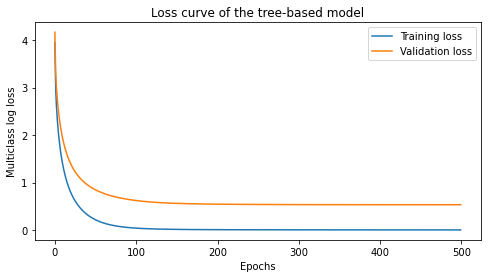

In [12]:
import matplotlib.pyplot as plt
plot_loss_curve(results, savefigure = False)